In [10]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [14]:
data.shape

(253680, 22)

In [15]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [16]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [18]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


# Preprocessing


In [19]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [20]:
data.duplicated().sum()

np.int64(23899)

In [21]:
data.drop_duplicates(inplace = True)

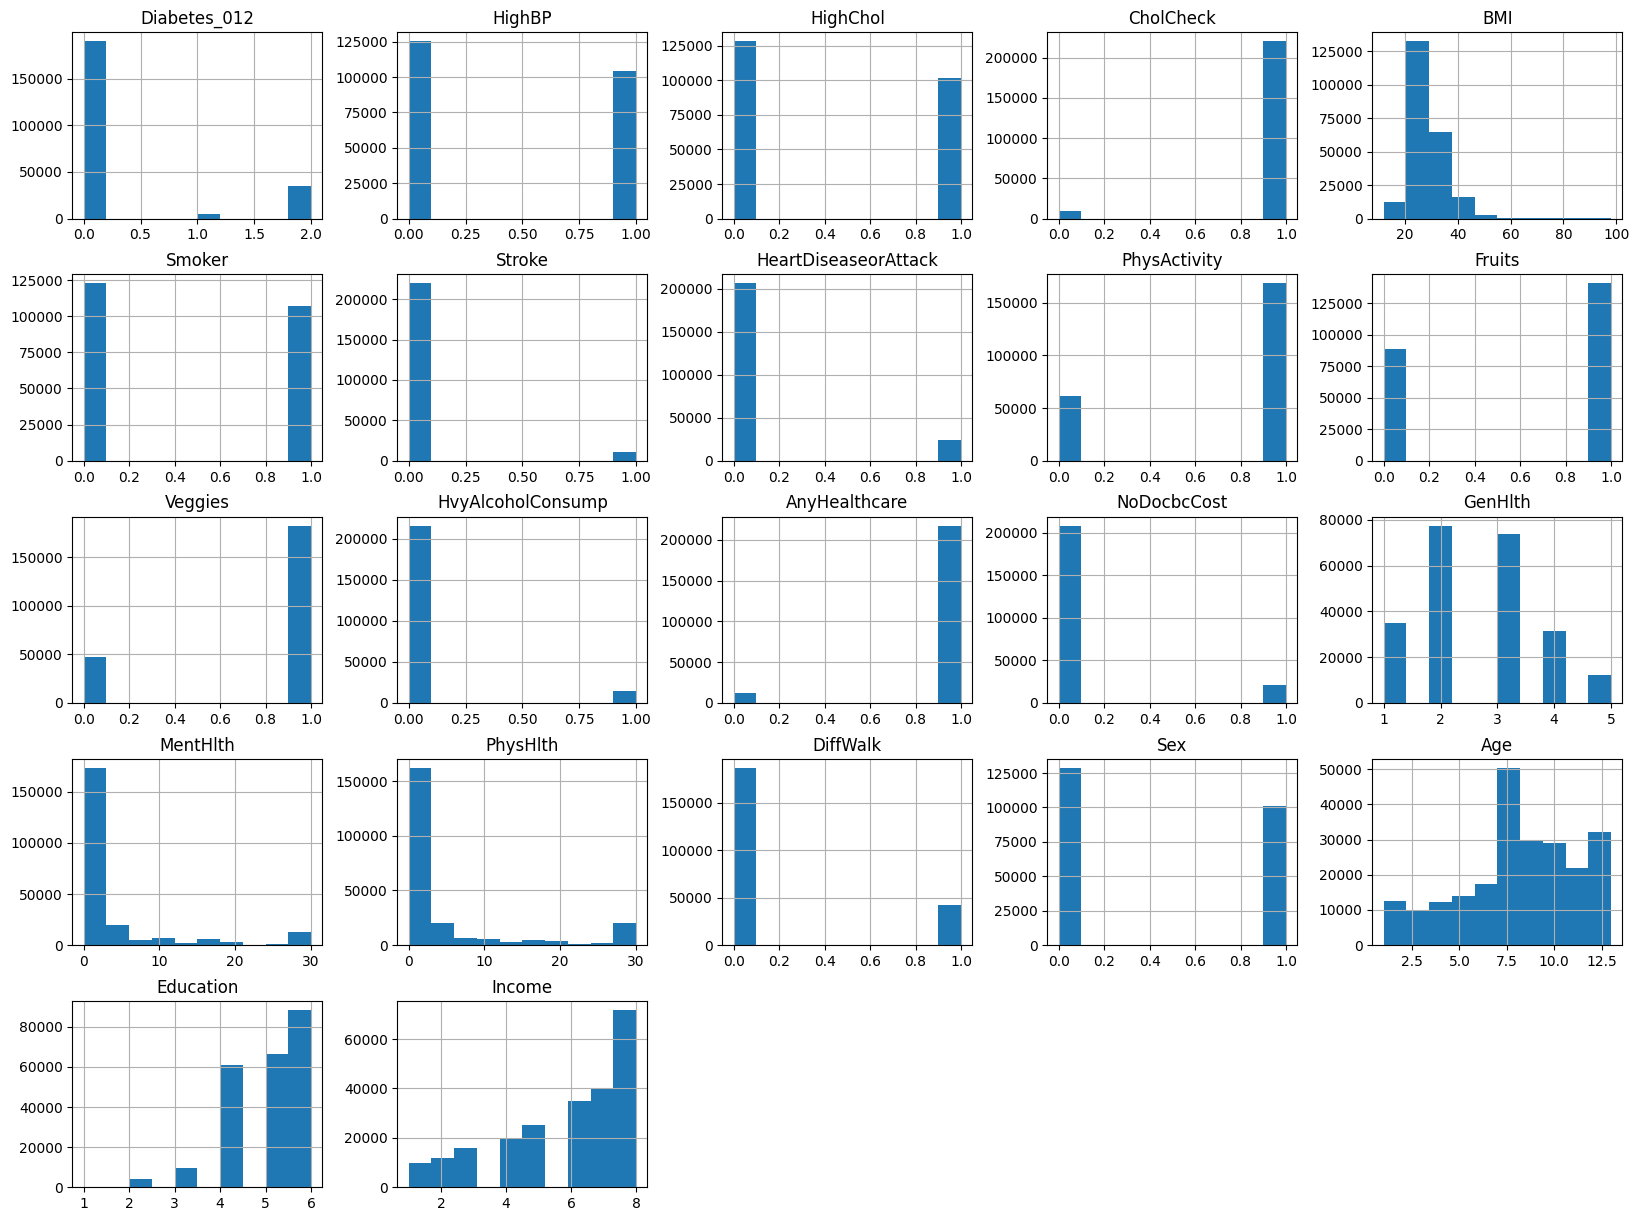

In [22]:
data.hist(figsize=(20,15));

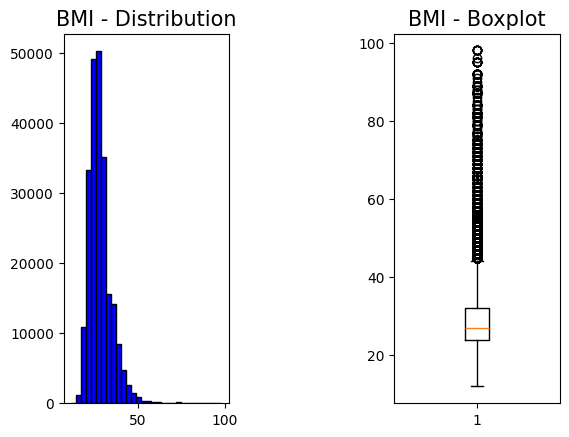

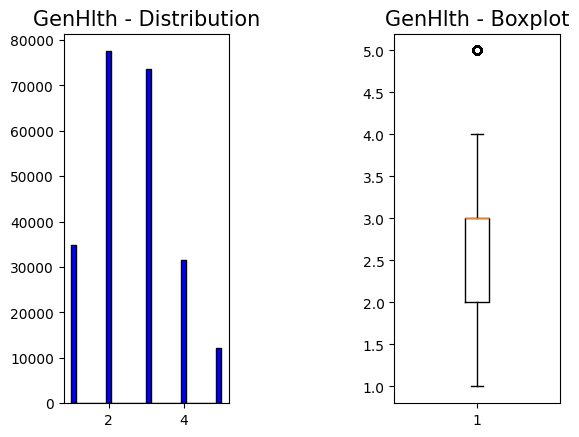

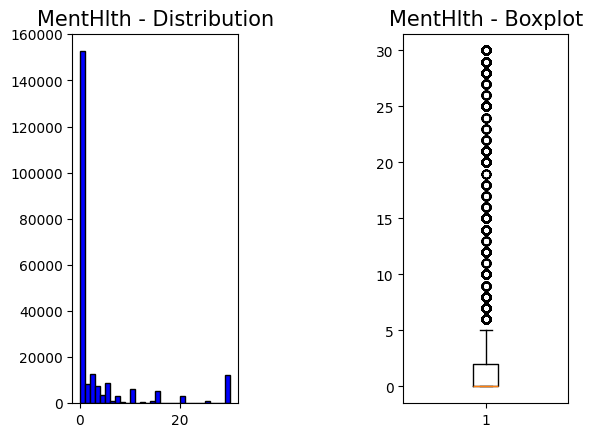

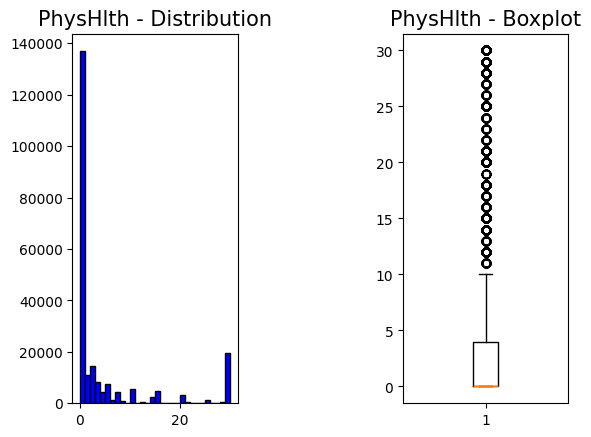

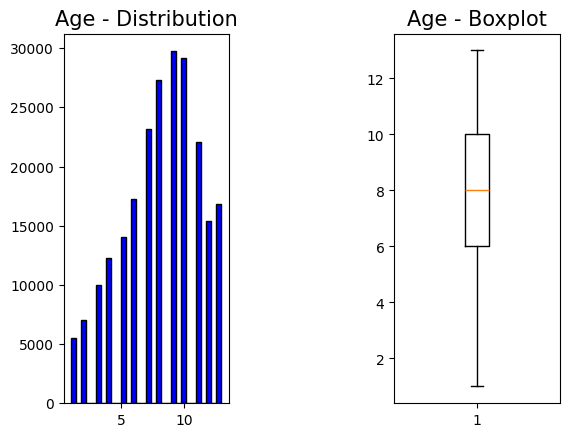

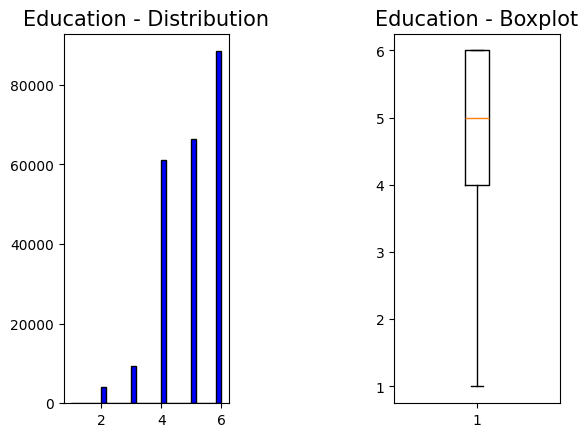

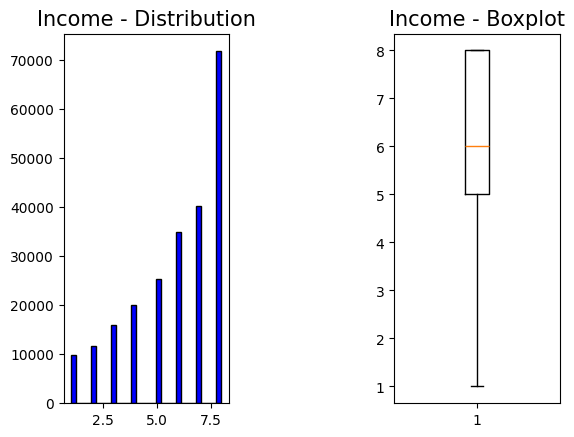

In [23]:
columns_to_plot = data[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']]

for column in columns_to_plot:
    plt.subplot(1, 2, 1)
    plt.title(f"{column} - Distribution", fontsize=15)
    plt.hist(data[column], bins=30, color='blue', edgecolor='black')


    plt.subplot(1, 2, 2)
    plt.title(f"{column} - Boxplot", fontsize=15)
    plt.boxplot(data[column])

    plt.subplots_adjust(wspace=1)
    plt.show()

In [24]:
data[(data["BMI"]>50) & (data["BMI"]<=100)].value_counts()

Diabetes_012  HighBP  HighChol  CholCheck  BMI   Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age   Education  Income
0.0           0.0     0.0       0.0        51.0  0.0     0.0     0.0                   0.0           0.0     1.0      0.0                1.0            0.0          2.0      0.0       0.0       0.0       0.0  6.0   6.0        6.0       1
                                                                                       1.0           1.0     1.0      0.0                0.0            0.0          3.0      5.0       0.0       0.0       1.0  2.0   4.0        4.0       1
                                                 1.0     1.0     0.0                   1.0           0.0     0.0      0.0                0.0            1.0          3.0      30.0      5.0       0.0       0.0  3.0   4.0        5.0       1
                                           52.0  1.0 

In [25]:
data[(data["BMI"]>50) & (data["BMI"]<=100)].median()

Diabetes_012             0.0
HighBP                   1.0
HighChol                 0.0
CholCheck                1.0
BMI                     56.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  3.0
MentHlth                 0.0
PhysHlth                 3.0
DiffWalk                 1.0
Sex                      0.0
Age                      7.0
Education                5.0
Income                   5.0
dtype: float64

In [26]:
data.loc[(data['BMI'] > 50) & (data['BMI'] < 100), 'BMI'] = 56

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca34608390>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca34609ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca345fb810>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca3460b1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca3460bcd0>],
 'means': []}

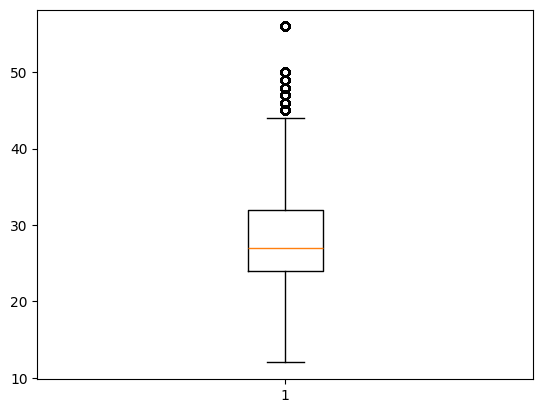

In [27]:
plt.boxplot(data['BMI'])

# EDA

Text(0.5, 1.0, 'correlation of feature')

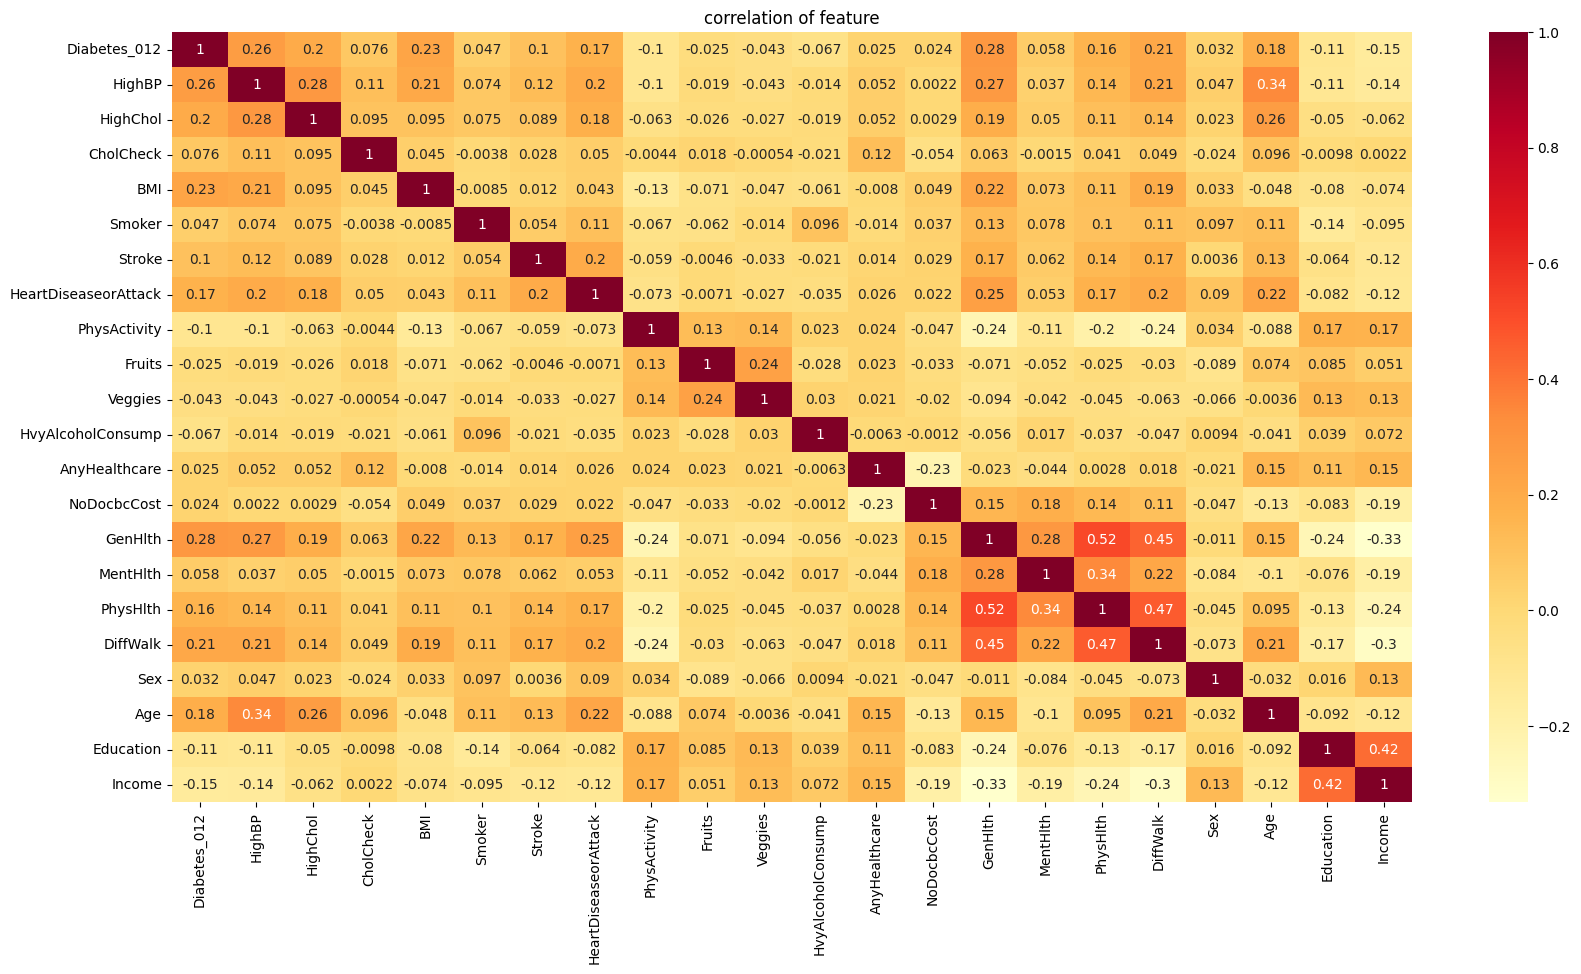

In [28]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

In [29]:
data2 = data.copy()

In [30]:
data2["Diabetes_012"]= data2["Diabetes_012"].replace({0:"No Diabetes",1:"Prediabetes", 2:"Diabetes"})

In [31]:
data["Diabetes_012"].value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

Text(0.5, 1.0, 'Value count of Diabetes_012 ')

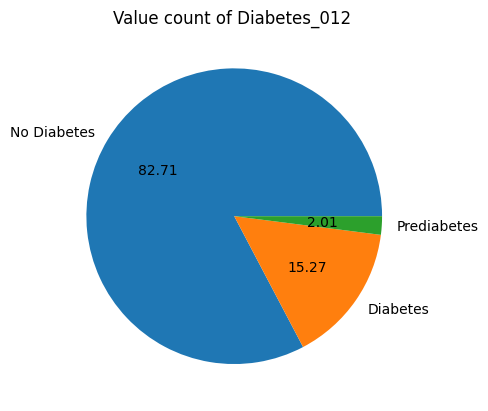

In [32]:
plt.pie(data["Diabetes_012"].value_counts() , labels =["No Diabetes", "Diabetes", "Prediabetes"] ,autopct='%.02f' );
plt.title('Value count of Diabetes_012 ')

Text(0.5, 1.0, 'Value count of HighBP ')

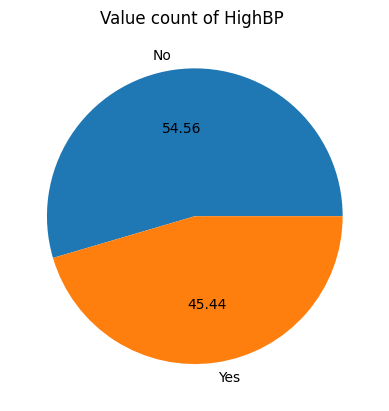

In [33]:
plt.pie(data["HighBP"].value_counts() , labels =["No", "Yes"] ,autopct='%.02f' );
plt.title('Value count of HighBP ')

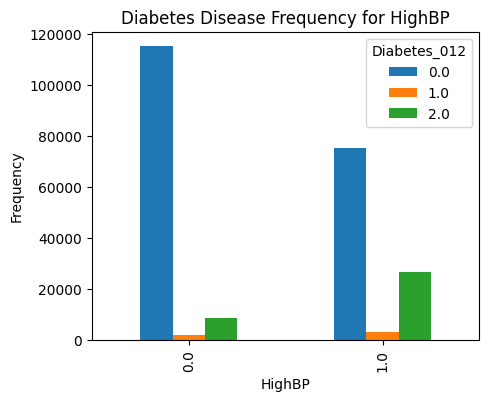

In [34]:
pd.crosstab(data.HighBP,data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Value count of HighChol')

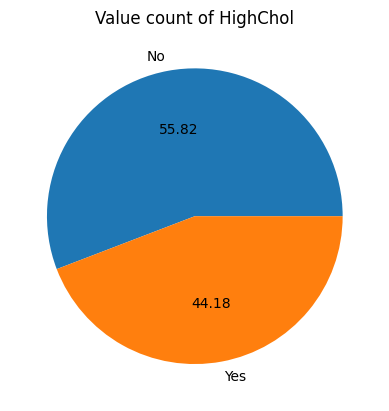

In [35]:
plt.pie(data["HighChol"].value_counts() , labels =["No", "Yes"] ,autopct='%.02f' );
plt.title('Value count of HighChol')

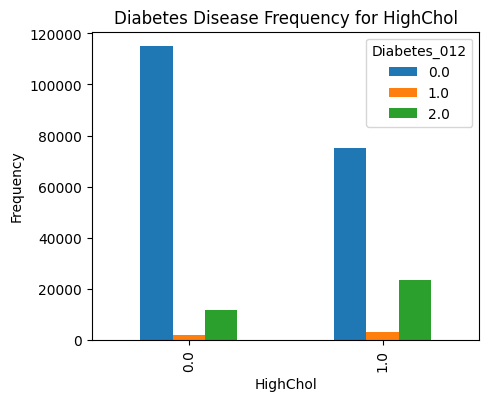

In [36]:
pd.crosstab(data.HighChol,data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for HighChol')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Relation among HighBP ,HighChol and Diabetes')

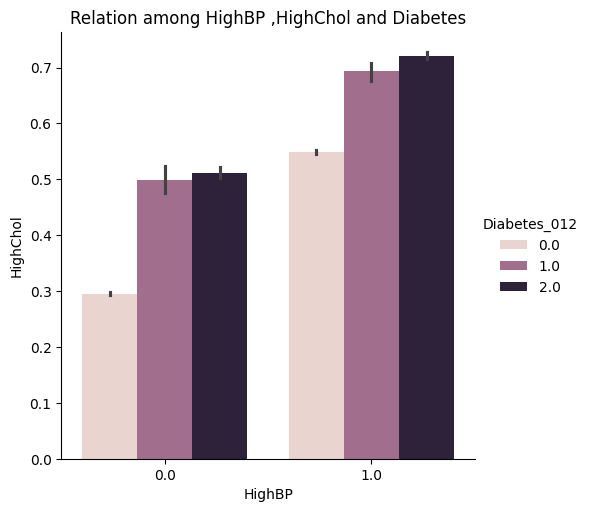

In [37]:
sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_012" , kind="bar" );
plt.title("Relation among HighBP ,HighChol and Diabetes")

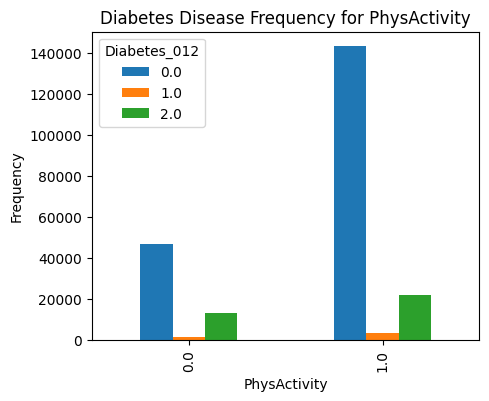

In [38]:
pd.crosstab(data.PhysActivity,data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

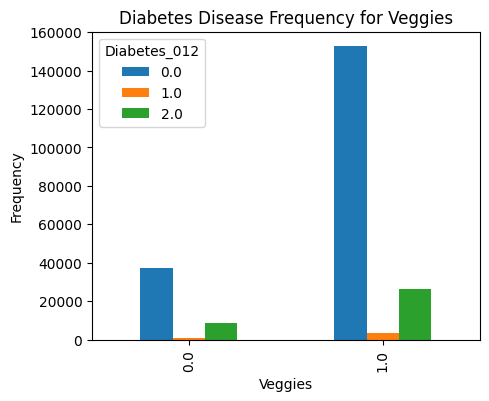

In [39]:
pd.crosstab(data.Veggies,data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

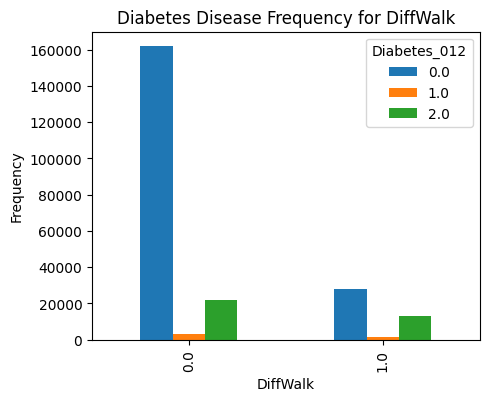

In [40]:
pd.crosstab(data.DiffWalk,data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for DiffWalk')
plt.xlabel("DiffWalk")
plt.ylabel('Frequency')
plt.show()

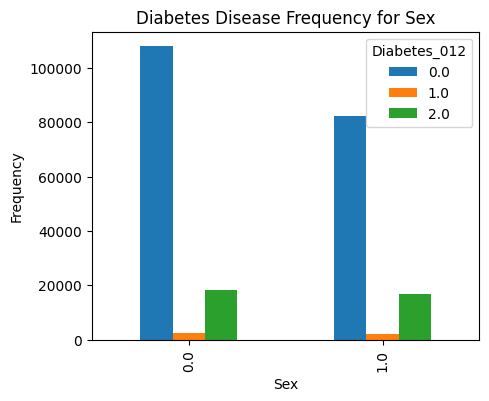

In [41]:
pd.crosstab(data.Sex,data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Sex')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.show()

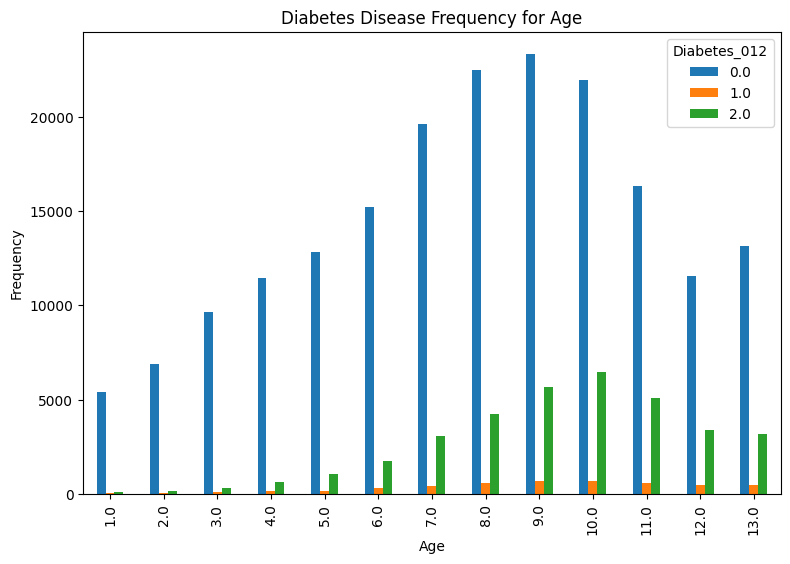

In [42]:
pd.crosstab(data.Age,data.Diabetes_012).plot(kind="bar",figsize=(9,6))

plt.title('Diabetes Disease Frequency for Age')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

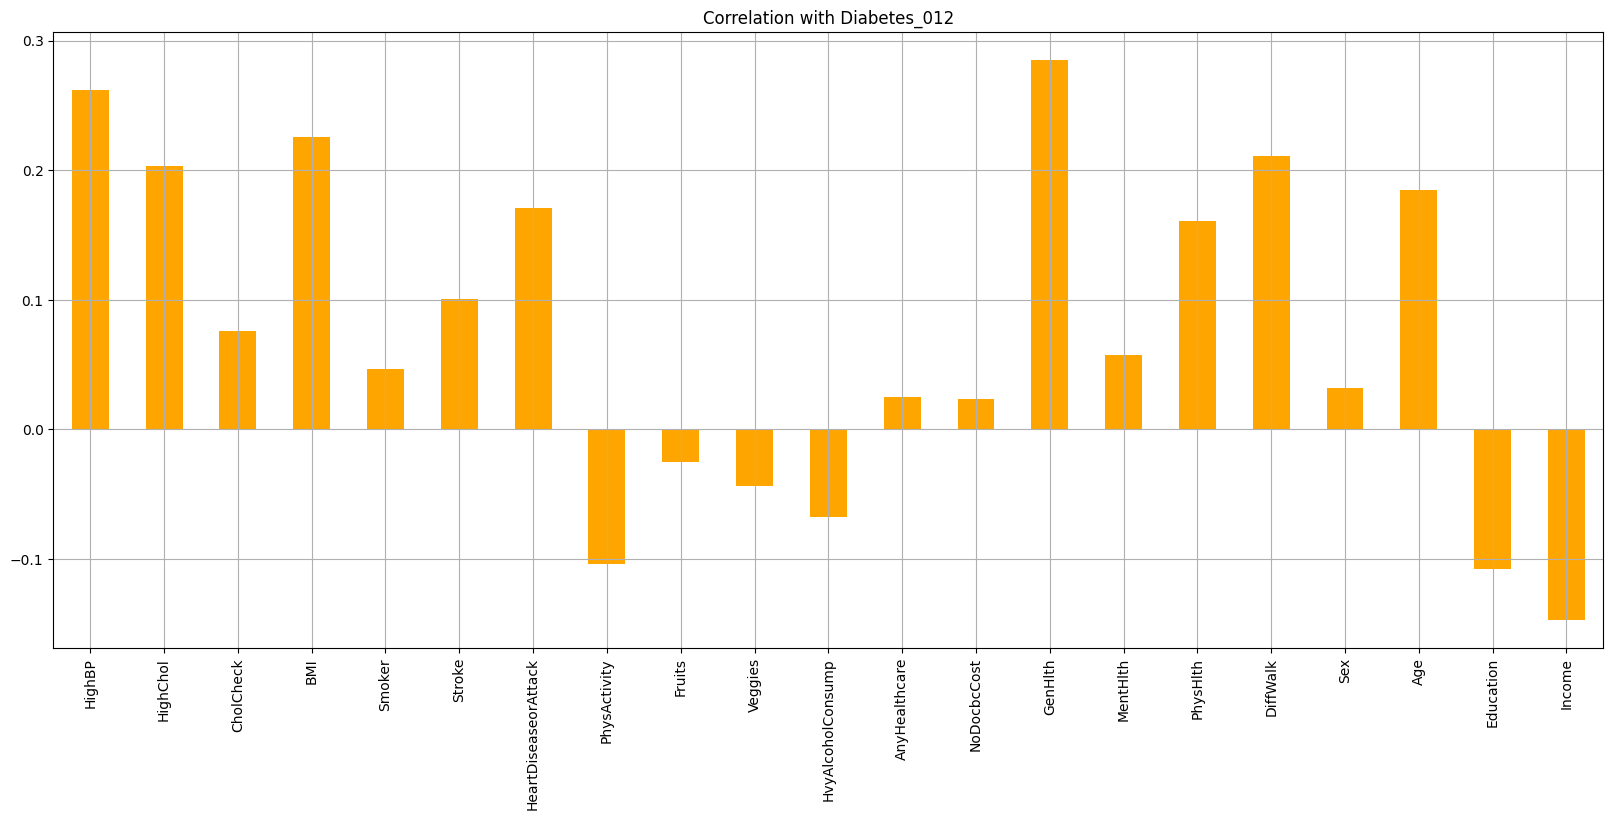

In [43]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_012",color="Orange");

# Feature selection

In [44]:
X = data2.iloc[:,1:]
Y = data2.iloc[:,0]

In [45]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=15)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

f_Scores = pd.concat([df_columns,df_scores],axis=1)
f_Scores.columns = ['Feature','Score']

print(f_Scores.nlargest(21,'Score'))

                 Feature          Score
15              PhysHlth  103705.813420
3                    BMI   16813.886097
14              MentHlth   13499.056578
18                   Age    9400.408945
0                 HighBP    8633.562752
16              DiffWalk    8310.280494
13               GenHlth    8142.602678
6   HeartDiseaseorAttack    6015.661944
1               HighChol    5381.985473
20                Income    3748.254712
5                 Stroke    2212.060848
10     HvyAlcoholConsump     973.676965
7           PhysActivity     656.187604
19             Education     537.068918
4                 Smoker     268.924145
12           NoDocbcCost     163.138397
17                   Sex     136.998866
9                Veggies      89.554915
8                 Fruits      57.666728
2              CholCheck      54.155676
11         AnyHealthcare       7.883473


In [46]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "NoDocbcCost"]

In [47]:
data.drop(colomns , axis= 1 ,inplace=True)

In [48]:
data

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,5.0,1.0


# Imbalanced

In [49]:
data = data.drop(data[data['Diabetes_012'] == 1].index)

In [50]:
data['Diabetes_012'].value_counts()

Diabetes_012
0.0    190055
2.0     35097
Name: count, dtype: int64

In [51]:
X=data.drop("Diabetes_012",axis=1)
y=data["Diabetes_012"]

In [52]:
X

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0,4.0,8.0
3,1.0,0.0,27.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,6.0,7.0
253676,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,11.0,2.0,4.0
253677,0.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,5.0,1.0


In [53]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 225152, dtype: float64

In [54]:
y.value_counts()

Diabetes_012
0.0    190055
2.0     35097
Name: count, dtype: int64

In [55]:
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [56]:
y_resampled.value_counts()

Diabetes_012
0.0    189848
2.0    189848
Name: count, dtype: int64

In [57]:
X_resampled.value_counts()

HighBP  HighChol  BMI   Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Age   Education  Income
1.0     1.0       31.0  0.0     0.0     0.0                   1.0           0.0                3.0      0.0       0.0       0.0       10.0  6.0        8.0       23
                  27.0  1.0     0.0     0.0                   1.0           0.0                2.0      0.0       0.0       0.0       11.0  4.0        5.0       20
        0.0       28.0  0.0     0.0     0.0                   1.0           0.0                2.0      0.0       0.0       0.0       10.0  6.0        8.0       19
        1.0       30.0  0.0     0.0     0.0                   1.0           0.0                2.0      0.0       0.0       0.0       9.0   6.0        7.0       18
                  27.0  0.0     0.0     0.0                   1.0           0.0                2.0      0.0       0.0       0.0       8.0   6.0        8.0       17
                      

In [58]:
X_resampled.shape , y_resampled.shape

((379696, 15), (379696,))

# Model

# lg

In [59]:
X_train , X_test , y_train , y_test = train_test_split(X_resampled,y_resampled, test_size=0.2 , random_state=52)

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [500, 700, 1000],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}


In [61]:

LRclassifier = LogisticRegression(C=0.01, class_weight=None, max_iter=1000, penalty='l1', solver='liblinear')
LRclassifier.fit(X_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [62]:
y_pred = LRclassifier.predict(X_test)

print('Training set score: {:.4f}'.format(LRclassifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(LRclassifier.score(X_test, y_test)))

Training set score: 0.7449
Test set score: 0.7430


In [63]:
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74     37858
         2.0       0.73      0.77      0.75     38082

    accuracy                           0.74     75940
   macro avg       0.74      0.74      0.74     75940
weighted avg       0.74      0.74      0.74     75940

Logistic Regression accuracy is: 74.30%


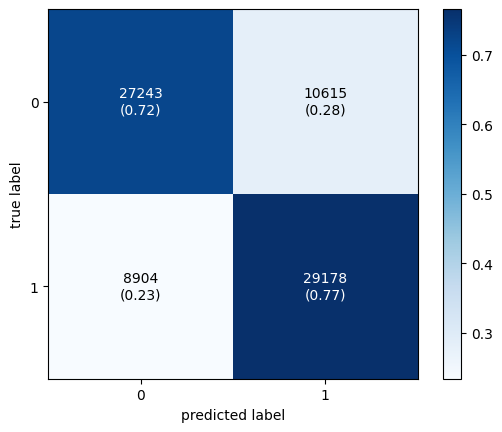

In [64]:
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# tree

In [65]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
param_grid = {'max_depth': [None, 5, 10, 15],
              'max_leaf_nodes': [None, 10, 20, 30],}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Hiển thị giá trị tốt nhất và tham số tương ứng
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': None, 'max_leaf_nodes': None}
Best Score:  0.8596669683756012


In [66]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Thiết lập không gian giá trị cho max_depth và max_leaf_nodes
param_dist = {'max_depth': [None] + list(np.arange(5, 30, 1)),
              'max_leaf_nodes': [None] + list(np.arange(10, 40, 5))}

# Sử dụng RandomizedSearchCV để tìm giá trị tốt nhất
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5)
random_search.fit(X_train, y_train)

# Hiển thị giá trị tốt nhất và tham số tương ứng
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'max_leaf_nodes': None, 'max_depth': np.int64(28)}
Best Score:  0.8568192890300423


In [67]:
DTclassifier = DecisionTreeClassifier(max_depth=28)
DTclassifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,28
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
y_pred=DTclassifier.predict(X_test)

print('Training set score: {:.4f}'.format(DTclassifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(DTclassifier.score(X_test, y_test)))

Training set score: 0.9700
Test set score: 0.8607


In [69]:
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     37858
         2.0       0.86      0.86      0.86     38082

    accuracy                           0.86     75940
   macro avg       0.86      0.86      0.86     75940
weighted avg       0.86      0.86      0.86     75940

Decision Tree accuracy is: 86.07%


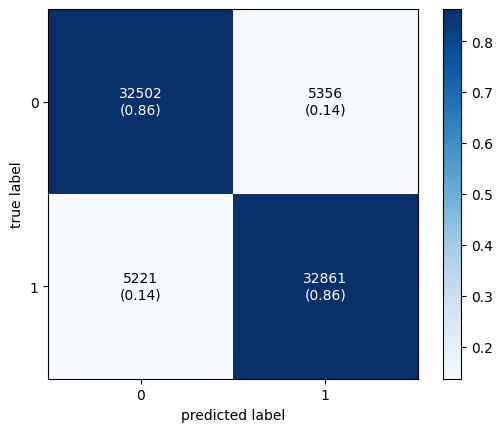

In [70]:
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# knn

In [71]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [2, 3, 5, 7, 9, 12]}

model = KNeighborsClassifier()
# Sử dụng GridSearchCV để tìm giá trị tốt nhất
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Hiển thị giá trị tốt nhất và tham số tương ứng
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 2}
Best Score:  0.8583567024740161


In [72]:
KNclassifier = KNeighborsClassifier(n_neighbors=2)
KNclassifier.fit(X_train, y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [73]:
y_pred=KNclassifier.predict(X_test)

print('Training set score: {:.4f}'.format(KNclassifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(KNclassifier.score(X_test, y_test)))

Training set score: 0.9751
Test set score: 0.8660


In [74]:
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNNAcc = accuracy_score(y_pred,y_test)
print('K Nearest Neighbours accuracy is: {:.2f}%'.format(KNNAcc*100))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86     37858
         2.0       0.84      0.90      0.87     38082

    accuracy                           0.87     75940
   macro avg       0.87      0.87      0.87     75940
weighted avg       0.87      0.87      0.87     75940

K Nearest Neighbours accuracy is: 86.60%


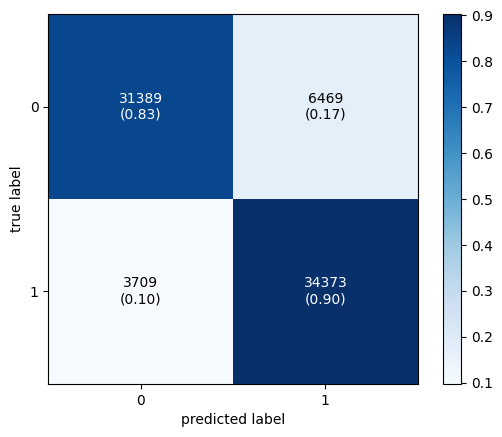

In [75]:
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# compare

In [76]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'Decision Tree'],
                        'Accuracy': [LRAcc*100, KNNAcc*100, DTAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,86.597314
2,Decision Tree,86.071899
0,Logistic Regression,74.296813


In [77]:
import pickle
pickle.dump(KNclassifier,open('diabetes_classifier.pkl','wb'))
model=pickle.load(open('diabetes_classifier.pkl','rb'))